Now that we've performed our EDA, we can start applying changes to our dataset. But first, let's analyze deeply the outliers in our dataset and what to do with them

Import required libraries

In [259]:
import pandas as pd
import numpy as np
import seaborn as sns

import sys
import os

import warnings
warnings.filterwarnings("ignore")

Import train dataset path

In [260]:
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("__file__"), "..")))

from Datasets.Datasets_paths import ds_train_path

Print library versions

In [261]:
print(f'Pandas Version: {pd.__version__}') 
print(f'Numpy Version: {np.__version__}') 
print(f'Seaborn version: {sns.__version__}')

Pandas Version: 1.5.3
Numpy Version: 1.23.5
Seaborn version: 0.12.2


Add for better visualization

In [262]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.4f}'.format

np.set_printoptions(suppress = True)

Load train dataset

In [263]:
ds_titanic_train = pd.read_csv(ds_train_path, encoding = 'unicode_escape')
ds_work = ds_titanic_train.copy()

# Checking correct load of dataset

Show first 10 registers

In [264]:
ds_work.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0000,1,0,237736,30.0708,NaN,C


Show last 10 registers

In [265]:
ds_work.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0000,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0000,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0000,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0000,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0000,0,0,370376,7.7500,NaN,Q


Show 10 random registers

In [266]:
ds_work.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
304,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0000,1,0,P/PP 3381,24.0000,NaN,C
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.0000,0,0,345781,9.5000,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0000,0,0,112059,0.0000,B94,S
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gregg)",female,52.0000,1,1,12749,93.5000,B69,S
460,461,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S
729,730,0,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0000,1,0,STON/O2. 3101271,7.9250,NaN,S
651,652,1,2,"Doling, Miss. Elsie",female,18.0000,0,1,231919,23.0000,NaN,S
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0000,0,0,C.A. 33111,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0000,0,0,PC 17754,34.6542,A5,C


Shape of dataset

In [267]:
ds_work.shape

(891, 12)

# Outlier Analysis

First of all, let's define a function to calculate and print all important values for a boxplot: 
* q1 (0.25-percentile)
* q3 (0.75-percentile)
* iqr (interquartile range)
* Lower whisker value (q1 - 1.5 * IQR)
* Upper whisker value (q3 + 1.5 * IQR)

In [268]:
def calculate_boxplot_parts(feature):
    q1 = np.nanpercentile(ds_work[[feature]], [25])[0]
    q3 = np.nanpercentile(ds_work[[feature]], [75])[0]
    iqr = q3 - q1
    lower_whisker = q1 - (1.5 * iqr)
    upper_whisker = q3 + (1.5 * iqr)

    print(f"Q1 = {q1}")
    print(f"Q3 = {q3}")
    print(f"IQR = {iqr}")
    print(f"Lower whisker = {lower_whisker}")
    print(f"Higher whisker = {upper_whisker}")

Now, going to our analysis, we found outliers for 4 features: Age, SibSp, Parch and Fare. First, we are going to check them individually.

## Outliers for Age

Let's plot again the histogram for Age

<AxesSubplot: xlabel='Age', ylabel='Count'>

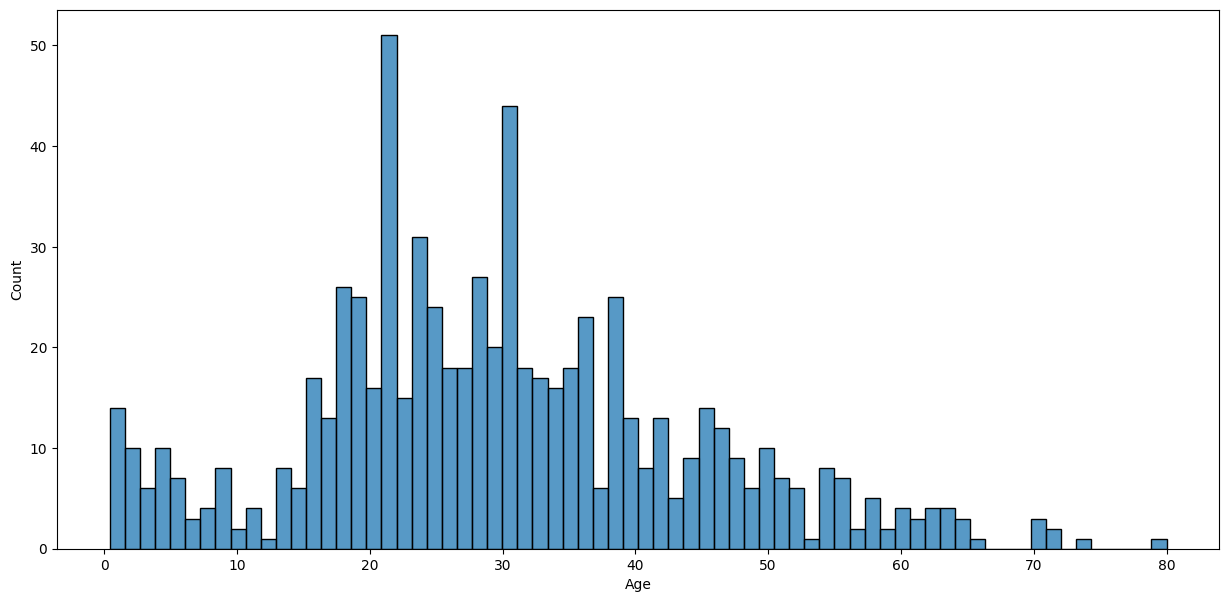

In [269]:
sns.histplot(ds_work["Age"], bins = 70)

From our EDA, we supposed that ages > 60 were outliers. Auto EDA libraries also told us that ages > 64.81 were considered outliers. Let's check for values in these ranges.

In [270]:
ds_work[(ds_work["Age"] > 60) & (ds_work["Age"] <= 64.81)].sort_values(by = "Age")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0000,0,0,111240,33.5000,B19,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0000,0,0,345364,6.2375,NaN,S
625,626,0,1,"Sutton, Mr. Frederick",male,61.0000,0,0,36963,32.3208,D50,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0000,0,0,113514,26.5500,C87,S
555,556,0,1,"Wright, Mr. George",male,62.0000,0,0,113807,26.5500,NaN,S
570,571,1,2,"Harris, Mr. George",male,62.0000,0,0,S.W./PP 752,10.5000,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0000,0,0,113572,80.0000,B28,NaN
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0000,0,0,4134,9.5875,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0000,1,4,19950,263.0000,C23 C25 C27,S


In [271]:
ds_work[ds_work["Age"] > 64.81].sort_values(by = "Age")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0000,0,1,113509,61.9792,B30,C
280,281,0,3,"Duane, Mr. Frank",male,65.0000,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0000,0,0,13509,26.5500,E38,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0000,0,0,C.A. 24579,10.5000,NaN,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0000,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0000,1,1,WE/P 5735,71.0000,B22,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5000,0,0,370369,7.7500,NaN,Q
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0000,0,0,PC 17754,34.6542,A5,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C
851,852,0,3,"Svensson, Mr. Johan",male,74.0000,0,0,347060,7.7750,NaN,S


The only relevant information we can get, is that most of them died, and they were all males. Aside from that, there doesn't seem to be anything wrong with these values.

Let's graph a boxplot for better understanding.

<AxesSubplot: xlabel='Age'>

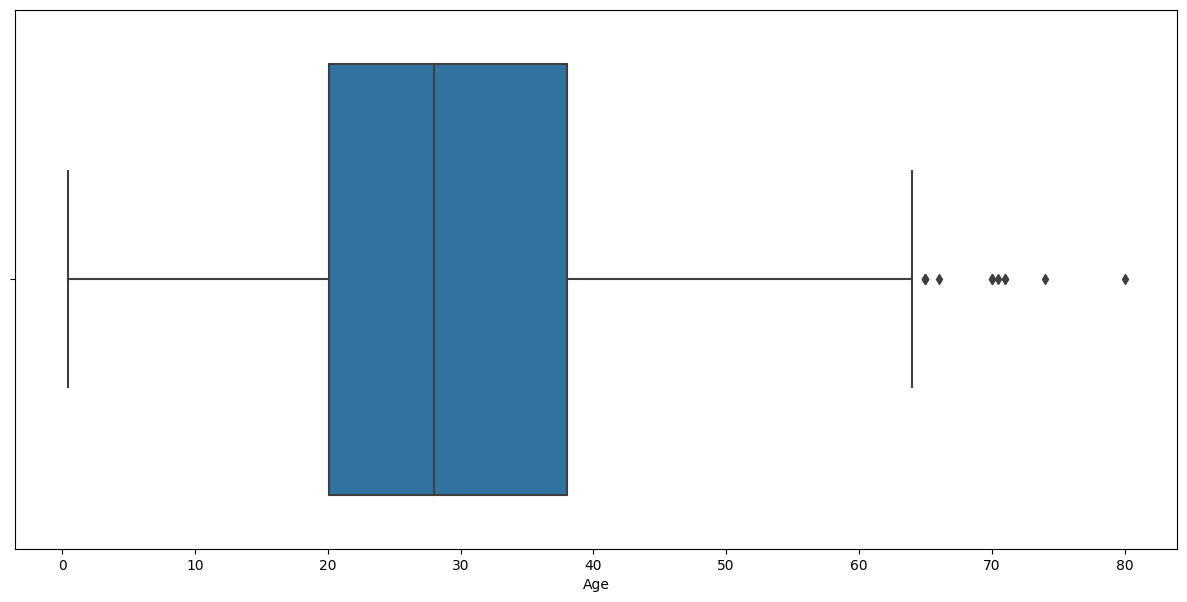

In [272]:
sns.boxplot(data = ds_work, x = "Age")

Now, let's calculate its parts to check most common values for this feature.

In [273]:
calculate_boxplot_parts("Age")

Q1 = 20.125
Q3 = 38.0
IQR = 17.875
Lower whisker = -6.6875
Higher whisker = 64.8125


So, values lower than -6.6875 are outliers and greater than 64.8125 are outliers. We can discard values lower than -6.6875 since there aren't any negative age. For values greater than 64.8125, even if most common values are between 20 and 38 years, ages above 64.8135 aren't wrong because they are possible.

## Outliers for SibSp

Let's plot again the histogram for SibSp

<AxesSubplot: xlabel='SibSp', ylabel='Count'>

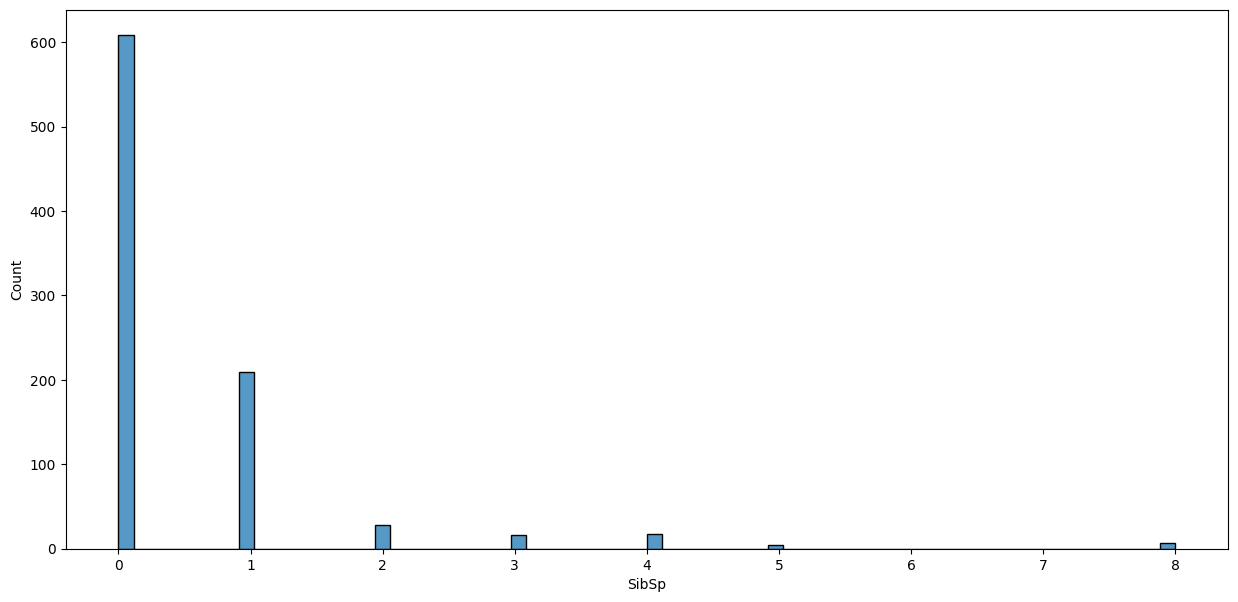

In [274]:
sns.histplot(ds_work["SibSp"], bins = 70)

From our EDA, we supposed that sibsp >= 2 were outliers. Auto EDA libraries also told us that sibsp > 2.50 were considered outliers. Let's check for values in these ranges.

In [275]:
ds_work[(ds_work["SibSp"] >= 2) & (ds_work["SibSp"] < 2.5)].sort_values(by = "SibSp")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0000,2,0,345764,18.0000,NaN,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0000,2,0,S.O.C. 14879,73.5000,NaN,S
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0000,2,0,PC 17611,133.6500,NaN,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0000,2,0,S.O.C. 14879,73.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.7500,2,1,2666,19.2583,NaN,C
618,619,1,2,"Becker, Miss. Marion Louise",female,4.0000,2,1,230136,39.0000,F4,S
600,601,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)",female,24.0000,2,1,243847,27.0000,NaN,S
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S
565,566,0,3,"Davies, Mr. Alfred J",male,24.0000,2,0,A/4 48871,24.1500,NaN,S
529,530,0,2,"Hocking, Mr. Richard George",male,23.0000,2,1,29104,11.5000,NaN,S


In [276]:
ds_work[ds_work["SibSp"] > 2.5].sort_values(by = "SibSp")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0000,3,1,349909,21.0750,NaN,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0000,3,1,349909,21.0750,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0000,3,1,349909,21.0750,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0000,3,2,19950,263.0000,C23 C25 C27,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0000,3,2,347088,27.9000,NaN,S
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.0000,3,2,347088,27.9000,NaN,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S
726,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0000,3,0,31027,21.0000,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)",female,33.0000,3,0,3101278,15.8500,NaN,S


There doesn't seem to be anything wrong with these values, but one thing we can note is that they might have to do with duplicated values that we analyzed in our EDA: Passengers with equal SibSp, Embarked, Fare, Parch, Ticket and Cabin values, and since most of them share last name, it could be safe to say that they are siblings. Since repeated Tickets generally correspond to family members, let's check if these people are siblings by sorting by Ticket too.

In [277]:
ds_work[ds_work["SibSp"] > 2.5].sort_values(by = ["SibSp", "Ticket"], ascending = False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0000,5,2,CA 2144,46.9000,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0000,5,2,CA 2144,46.9000,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0000,5,2,CA 2144,46.9000,NaN,S


To confirm our guessing, let's group passengers with SibSp > 2.5 by Ticket

In [278]:
ds_work[ds_work["SibSp"] > 2.5].groupby(["Ticket"])[["PassengerId", "SibSp"]].count()

,PassengerId,SibSp
Ticket,,
19950,3,3
3101278,1,1
3101281,1,1
3101295,5,5
31027,1,1
347077,3,3
347082,5,5
347088,4,4
349909,3,3


So for example, 7 passengers had the ticket CA. 2343, and all of them had a sibsp of 7 (Maybe all of them were siblings, and each one had 1 spouse). So, we can say that our guessing was right.

Let's graph a boxplot for better understanding.

<AxesSubplot: xlabel='SibSp'>

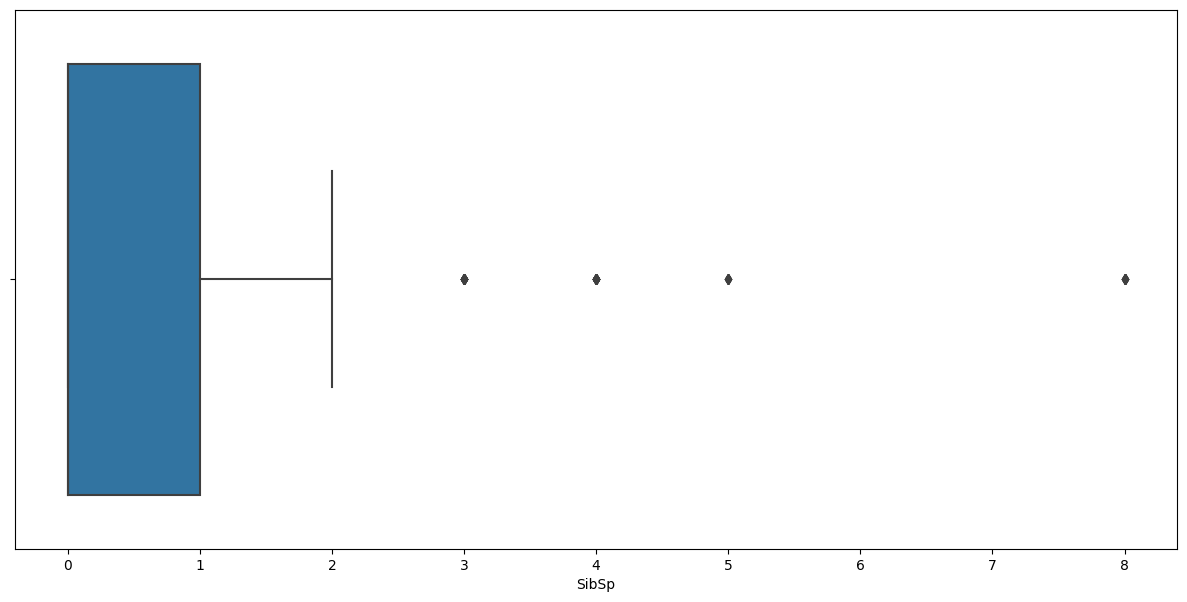

In [279]:
sns.boxplot(data = ds_work, x = "SibSp")

Now, let's calculate its parts to check most common values for this feature.

In [280]:
calculate_boxplot_parts("SibSp")

Q1 = 0.0
Q3 = 1.0
IQR = 1.0
Lower whisker = -1.5
Higher whisker = 2.5


So, values lower than -1.5 are outliers and greater than 2.5 are outliers. We can discard values lower than -1.5 since there aren't any negative sibsp. For values greater than 2.5, even if most common values are 0 and 1 sibsp, greater values are possible, and we confirmed they belonged to families with many siblings.

## Outliers for Parch

Let's plot again the histogram for Parch

<AxesSubplot: xlabel='Parch', ylabel='Count'>

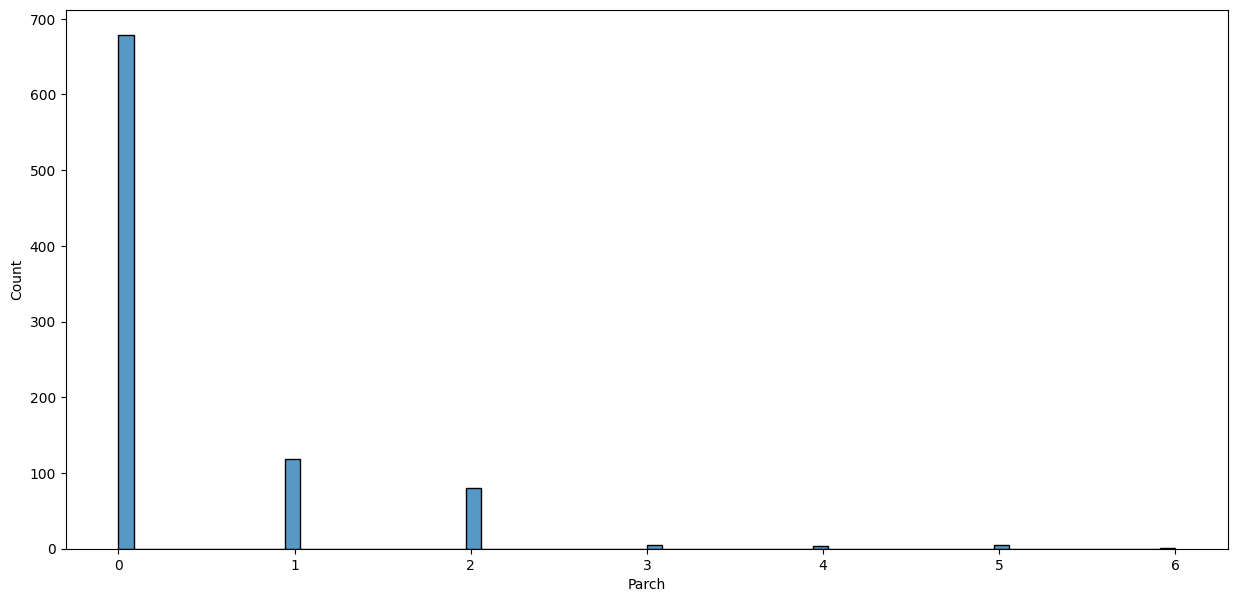

In [281]:
sns.histplot(ds_work["Parch"], bins = 70)

From our EDA, we supposed that parch > 2 were outliers. Auto EDA libraries also told us that parch > 0 were considered outliers. Let's check for values in these ranges.

In [282]:
ds_work[(ds_work["Parch"] > 0) & (ds_work["Parch"] <= 2)].sort_values(by = "Parch")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0000,3,1,349909,21.0750,NaN,S
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0000,0,1,111361,57.9792,B18,C
529,530,0,2,"Hocking, Mr. Richard George",male,23.0000,2,1,29104,11.5000,NaN,S
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0000,1,1,26360,26.0000,NaN,S
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.0000,1,1,2690,7.2292,NaN,C
548,549,0,3,"Goldsmith, Mr. Frank John",male,33.0000,1,1,363291,20.5250,NaN,S
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0000,1,1,C.A. 33112,36.7500,NaN,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0000,1,1,110413,79.6500,E67,S
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.0000,1,1,237789,30.0000,NaN,S
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth Morris)",female,39.0000,1,1,17421,110.8833,C68,C


In [283]:
ds_work[ds_work["Parch"] > 2].sort_values(by = "Parch")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
86,87,0,3,"Ford, Mr. William Neal",male,16.0000,1,3,W./C. 6608,34.3750,NaN,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0000,2,3,29106,18.7500,NaN,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0000,1,3,W./C. 6608,34.3750,NaN,S
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0000,1,3,29105,23.0000,NaN,S
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0000,0,3,2666,19.2583,NaN,C
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0000,1,4,347088,27.9000,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0000,1,4,347088,27.9000,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0000,1,4,19950,263.0000,C23 C25 C27,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0000,0,4,349909,21.0750,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0000,1,5,347082,31.2750,NaN,S


There doesn't seem to be anything wrong with these values. Just like with SibSp, let's check whether these people are related, since they share last name, and also Embarked, Fare, Ticket and Cabin values. Since repeated Tickets generally correspond to family members, and parents and children don't necessarily share Parch values (Since a child has 2 parents as much, and parents could have many children), let's only sort by Ticket.

In [284]:
ds_work[ds_work["Parch"] > 0][["Name", "Ticket", "Parch", "Age"]].sort_values(by = "Ticket")

,Name,Ticket,Parch,Age
262,"Taussig, Mr. Emil",110413,1,52.0000
585,"Taussig, Miss. Ruth",110413,2,18.0000
558,"Taussig, Mrs. Emil (Tillie Mandelbaum)",110413,1,39.0000
523,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",111361,1,44.0000
329,"Hippach, Miss. Jean Gertrude",111361,1,16.0000
377,"Widener, Mr. Harry Elkins",113503,2,27.0000
356,"Bowerman, Miss. Elsie Edith",113505,1,22.0000
166,"Chibnall, Mrs. (Edith Martha Bowerman)",113505,1,NaN
54,"Ostby, Mr. Engelhart Cornelius",113509,1,65.0000
763,"Carter, Mrs. William Ernest (Lucile Polk)",113760,2,36.0000


Checking the passengers with shared tickets, most of them share last name, and checking their Parch and Age values, they make sense. So for example:

In [285]:
ds_work[ds_work["Ticket"] == "110413"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
262,263,0,1,"Taussig, Mr. Emil",male,52.0000,1,1,110413,79.6500,E67,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0000,1,1,110413,79.6500,E67,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.0000,0,2,110413,79.6500,E68,S


Miss. Ruth has a parch value of 2 and she is younger than Mr. Emil and Mrs. Emil, both who have a parch value of 1, so she must be their child.

Let's graph a boxplot for better understanding.

<AxesSubplot: xlabel='Parch'>

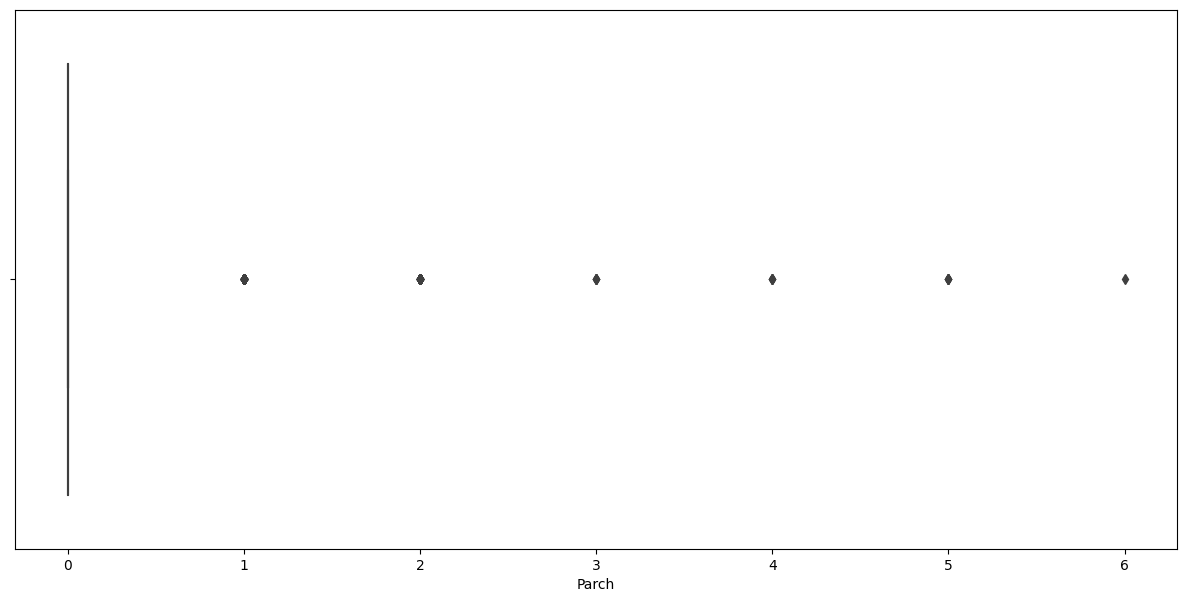

In [286]:
sns.boxplot(data = ds_work, x = "Parch")

It is pointless to calculate the parts for this boxplot. This just confirms that values greater than 0 are outliers. For these values, even if the most common value is 0, greater values are possible, and we confirmed before that some passengers who shared Ticket belonged to numerous families who had many children.

## Outliers for Fare

Let's plot again the histogram for Fare

<AxesSubplot: xlabel='Fare', ylabel='Count'>

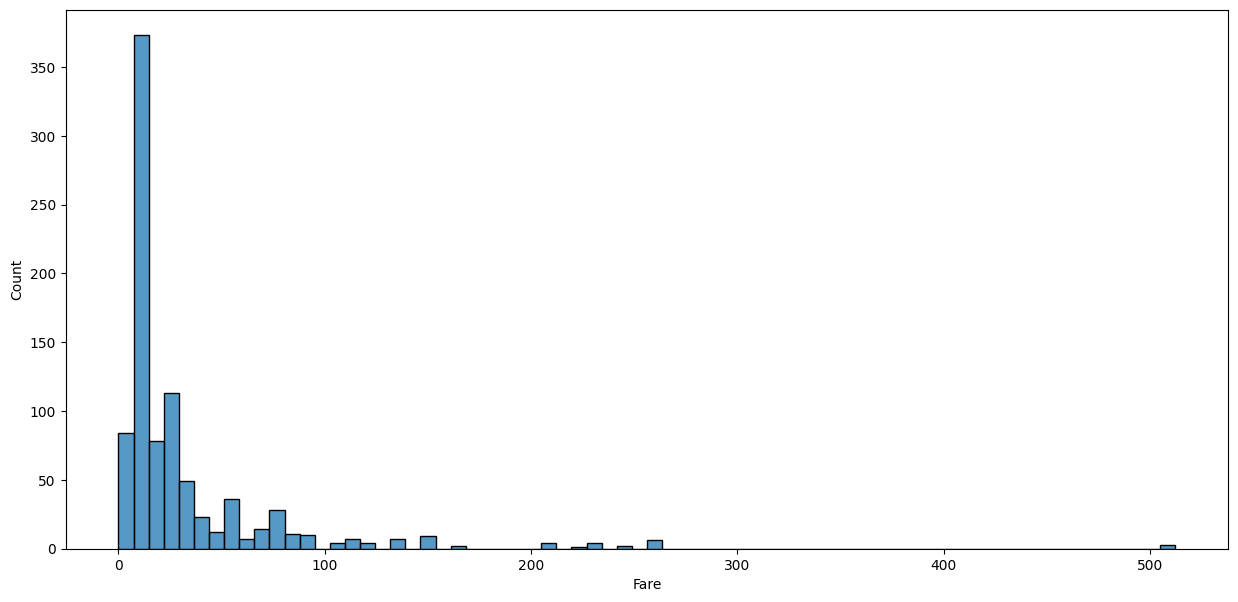

In [287]:
sns.histplot(ds_work["Fare"], bins = 70)

From our EDA, we supposed that fares > 200 were outliers. Auto EDA libraries also told us that fares > 65.63 were considered outliers. Let's check for values in these ranges.

In [288]:
ds_work[(ds_work["Fare"] > 65.63) & (ds_work["Fare"] <= 200)].sort_values(by = "Fare")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0000,1,0,113776,66.6000,C2,S
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0000,1,0,113776,66.6000,C2,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0000,0,0,PC 17477,69.3000,B35,C
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0000,0,0,PC 17477,69.3000,B35,C
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [289]:
ds_work[ds_work["Fare"] > 200].sort_values(by = "Fare")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton McMillan)",female,43.0000,0,1,24160,211.3375,B3,S
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0000,0,1,24160,211.3375,B5,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0000,0,2,113503,211.5000,C82,C
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0000,0,0,PC 17757,227.5250,C45,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0000,1,0,PC 17757,227.5250,C62 C64,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0000,0,0,PC 17757,227.5250,NaN,C
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0000,0,1,PC 17558,247.5208,B58 B60,C


But there is nothing wrong with these values. The only relevant information we can get, is that people who paid a higher Fare usually travelled in 1st class, which makes sense. Let's confirm that by calculating the percentage of passengers who paid a Fare > 65.63 and travelled in 1st class.

In [290]:
ds_high_fares = ds_work[ds_work["Fare"] > 65.63]
ds_high_fares_first_class = ds_work[(ds_work["Fare"] > 65.63) & (ds_work["Pclass"] == 1)]

print(f"Percentage of passengers that paid a high fare and travelled in 1st class: {round((ds_high_fares_first_class.shape[0] / ds_high_fares.shape[0]) * 100, 4)} %")

Percentage of passengers that paid a high fare and travelled in 1st class: 89.6552 %


So, around 90% of passengers that paid these high fares travelled in 1st class. So, our guessing was right.

Let's graph a boxplot for better understanding.

<AxesSubplot: xlabel='Fare'>

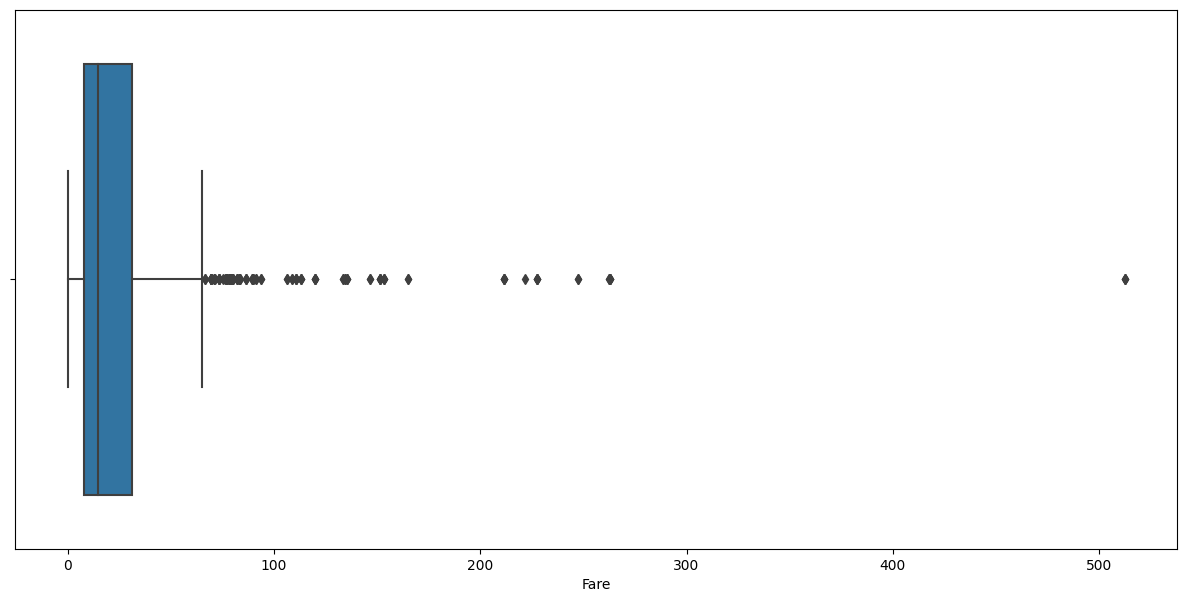

In [291]:
sns.boxplot(data = ds_work, x = "Fare")

Now, let's calculate its parts to check most common values for this feature.

In [292]:
calculate_boxplot_parts("Fare")

Q1 = 7.9104
Q3 = 31.0
IQR = 23.0896
Lower whisker = -26.724
Higher whisker = 65.6344


So, values lower than -26.724 are outliers and greater than 65.6344 are outliers. We can discard values lower than -26.724 since there aren't any negative fares. For values greater than 65.6344, even if most common values are between 7.9104 and 31.0, fares above 65.6344 are possible and we found that it makes sense for them to correspond to passengers who travelled in 1st class.

# Outlier percentage of dataset

Let's calculate the percentage of outliers per feature

In [293]:
ds_age_outliers = ds_work[ds_work["Age"] >= 64.81]
ds_sibsp_outliers = ds_work[ds_work["SibSp"] > 2.5]
ds_parch_outliers = ds_work[ds_work["Parch"] > 0]
ds_fare_outliers = ds_work[ds_work["Fare"] >= 65.6344]

print(f"Age outliers percentage: {round((ds_age_outliers.shape[0] / ds_work.shape[0]) * 100, 4)} %")
print(f"Sibsp outliers percentage: {round((ds_sibsp_outliers.shape[0] / ds_work.shape[0]) * 100, 4)} %")
print(f"Parch outliers percentage: {round((ds_parch_outliers.shape[0] / ds_work.shape[0]) * 100, 4)} %")
print(f"Fare outliers percentage: {round((ds_fare_outliers.shape[0] / ds_work.shape[0]) * 100, 4)} %")

Age outliers percentage: 1.2346 %
Sibsp outliers percentage: 5.1627 %
Parch outliers percentage: 23.9057 %
Fare outliers percentage: 13.0191 %


So, Age and SibSp have too little outliers values, while Fare and Parch have more outlier values

Now, let's calculate the percentage of outliers of the entire dataset

In [294]:
ds_total_outliers = ds_work[(ds_work["Age"] >= 64.81) | (ds_work["SibSp"] > 2.5) | (ds_work["Parch"] > 0) | (ds_work["Fare"] >= 65.6344)]

print(f"Total outliers percentage: {round((ds_total_outliers.shape[0] / ds_work.shape[0]) * 100, 4)} %")

Total outliers percentage: 32.8844 %


So, 1/3 of the dataset have values that are considered outliers.

# Conclussions

We analyzed each outlier value for our features of interest, whether they were logical, whether they made sense or not, and we found that all of them are possible, and for now, they shouldn't be deleted since we don't know whether they alter the distributions too much (We can check later), and if we delete them, we are deleting an important % of the dataset (Almost 33%)